## M345SC 2019 Lab 4

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [1]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
                L4[v] = L4[x] + [v]
            
            print("v=",v)
            print("Q=",Q)
    return L2,L3,L4

1. Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for the shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that the shortes path between nodes 0 and 1 is 0->2->3->1. 

In [ ]:
#New function here


2. Test your function with a modestly-sized Barabasi-Albert graph and verify that it computes shortest-paths correctly:

Populating the interactive namespace from numpy and matplotlib


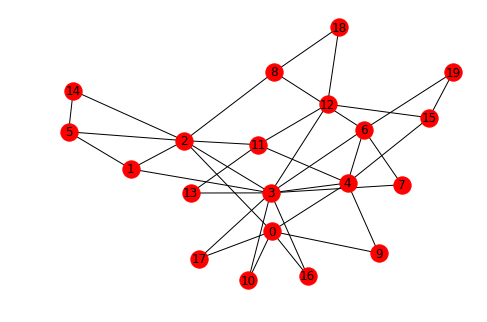

In [18]:
%pylab inline
BArandom = nx.barabasi_albert_graph(20, 2)
figure()
nx.draw(BArandom, with_labels=True)

In [19]:
L1, L2, L3 = bfs(BArandom, 0)
print(L3)

***x= 0  ***
v= 2
Q= [2]
v= 4
Q= [2, 4]
v= 9
Q= [2, 4, 9]
v= 10
Q= [2, 4, 9, 10]
v= 16
Q= [2, 4, 9, 10, 16]
v= 17
Q= [2, 4, 9, 10, 16, 17]
***x= 2  ***
v= 0
Q= [4, 9, 10, 16, 17]
v= 1
Q= [4, 9, 10, 16, 17, 1]
v= 3
Q= [4, 9, 10, 16, 17, 1, 3]
v= 5
Q= [4, 9, 10, 16, 17, 1, 3, 5]
v= 8
Q= [4, 9, 10, 16, 17, 1, 3, 5, 8]
v= 11
Q= [4, 9, 10, 16, 17, 1, 3, 5, 8, 11]
v= 14
Q= [4, 9, 10, 16, 17, 1, 3, 5, 8, 11, 14]
***x= 4  ***
v= 0
Q= [9, 10, 16, 17, 1, 3, 5, 8, 11, 14]
v= 3
Q= [9, 10, 16, 17, 1, 3, 5, 8, 11, 14]
v= 6
Q= [9, 10, 16, 17, 1, 3, 5, 8, 11, 14, 6]
v= 9
Q= [9, 10, 16, 17, 1, 3, 5, 8, 11, 14, 6]
v= 11
Q= [9, 10, 16, 17, 1, 3, 5, 8, 11, 14, 6]
v= 15
Q= [9, 10, 16, 17, 1, 3, 5, 8, 11, 14, 6, 15]
***x= 9  ***
v= 0
Q= [10, 16, 17, 1, 3, 5, 8, 11, 14, 6, 15]
v= 4
Q= [10, 16, 17, 1, 3, 5, 8, 11, 14, 6, 15]
***x= 10  ***
v= 0
Q= [16, 17, 1, 3, 5, 8, 11, 14, 6, 15]
v= 3
Q= [16, 17, 1, 3, 5, 8, 11, 14, 6, 15]
***x= 16  ***
v= 0
Q= [17, 1, 3, 5, 8, 11, 14, 6, 15]
v= 3
Q= [17, 1, 3, 5, 8, 11, 14

### Task 2: Code performance and memory

As you move to larger problems, memory usage becomes an increasingly important consideration when developing and analyzing codes. Generally, we wish to use as little memory as possible, but there are more subtle issues that can pop up as well.
Consider simple calculations with matrices. 2-D Numpy arrays store elements in *row-major* order which can influence the performance of seemingly similar operations with numpy arrays. Row-major order means that elements (i,j) and (i,j+1) are typically stored in adjacent locations in memory.

1) Construct a large *n x n* random matrix and: i) iterate across the rows of the matrix computing the standard deviation of each column and ii) iterate across the columns of the matrix computing the standard deviation of each row. Compare the walltime required by the two cases for a few different values of *n*. Is one case noticeably faster for large *n*?

In [3]:
def rowit(rmatrix, n):
    colsd = 0
    colmean = np.sum(rmatrix, axis = 0)/n
    for r in range(n):
        colsd += (rmatrix[r] - colmean)**2
    colsd = np.sqrt(colsd)
    
    return colsd

def colit(rmatrix, n):
    rowsd = 0
    rowmean = np.sum(rmatrix, axis = 1)/n
    for c in range(n):
        rowsd += (rmatrix[:, c] - rowmean)**2
    rowsd = np.sqrt(rowsd)
    
    return rowsd

In [16]:
import numpy as np
from time import time
n1 = 5000
n2 = n1*2

In [17]:
rmatrix = np.random.rand(n1,n1)
t1 = time()
rowit(rmatrix, n1)
t2 = time()
print("running time is", t2-t1)

rmatrix = np.random.rand(n2,n2)
t1 = time()
rowit(rmatrix, n2)
t2 = time()
print("running time is", t2-t1)

running time is 0.15445780754089355
running time is 0.5318682193756104


In [18]:
rmatrix = np.random.rand(n1,n1)
t1 = time()
colit(rmatrix, n1)
t2 = time()
print("running time is", t2-t1)

rmatrix = np.random.rand(n2,n2)
t1 = time()
colit(rmatrix, n2)
t2 = time()
print("running time is", t2-t1)

running time is 0.4630777835845947
running time is 2.804068088531494


The running time of iterating through each column for large 
n=5000 is larger than 3 times
n=10000 is larger than 5 times
comparing to iterating through each rows.

2) Now, repeat the calculations above, but replace the loops across rows or columns with the built-in method for computing standard deviations with numpy arrays. Do the timing results change?

In [28]:
# calculate for col standard deviation
import numpy as np
from time import time
rmatrix = np.random.rand(n1,n1)
t1 = time()
np.std(rmatrix, axis=0)
t2 = time()
print("running time is", t2-t1)

rmatrix = np.random.rand(n2,n2)
t1 = time()
np.std(rmatrix, axis=0)
t2 = time()
print("running time is", t2-t1)

running time is 0.2637491226196289
running time is 0.9924969673156738


In [27]:
# calculate for row standard deviation
rmatrix = np.random.rand(n1,n1)
t1 = time()
np.std(rmatrix, axis=1)
t2 = time()
print("running time is", t2-t1)

rmatrix = np.random.rand(n2,n2)
t1 = time()
np.std(rmatrix, axis=1)
t2 = time()
print("running time is", t2-t1)

running time is 0.24564003944396973
running time is 2.7170639038085938


In [31]:
a = np.array([[1,1], [0.5,0.5]])
np.std(a, axis=0)

array([0.25, 0.25])

The running time for the built in methods:
n=5000 not so much difference; however both slower than our iteration method of calculating col std.
n=10000 calculate for col std is 3 times faster than calculating for the row std; but slower than our method.